In [46]:
import numpy as np
import pandas as pd

In [47]:
train = pd.read_csv('C:/Users/dong5/train.csv')
test = pd.read_csv('C:/Users/dong5/test.csv')

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.isnull().sum() #비어있는 항 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Name

In [50]:
train_test_data = [train, test] #훈련 및 시험 데이터 세트 결합

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)
# 이름에서 Mr., Miss., Mrs.만 빼내는 작업

In [51]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Ms            1
Mme           1
Countess      1
Lady          1
Sir           1
Don           1
Capt          1
Name: Title, dtype: int64

In [52]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [53]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3, 'Dona': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
#MR: 0, Miss: 1, Mrs: 2, Others: 3 (택스트를 숫자로 하여 컴퓨터가 계산을 쉽게 하기 위해)

In [54]:
test['Title'].fillna(train.groupby('Title')['Title'].transform('median'),inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [56]:
def bar_chart(feature): #시각화 위한 막대차트 생성
    survived = train[train['Survived']==1][feature].value_counts() #survived가 1은 살아있음을 뜻함
    dead = train[train['Survived']==0][feature].value_counts() #0은 죽었음을 뜻함
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

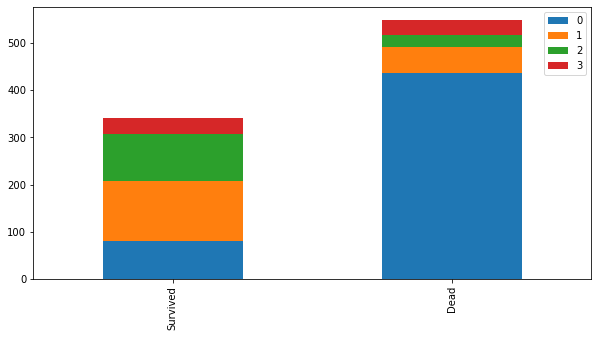

In [57]:
bar_chart('Title')

In [58]:
# 데이터 셋에서 불필요한 Name 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Sex

In [60]:
sex_mapping = {"male": 0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
#남자: 0, 여자: 1

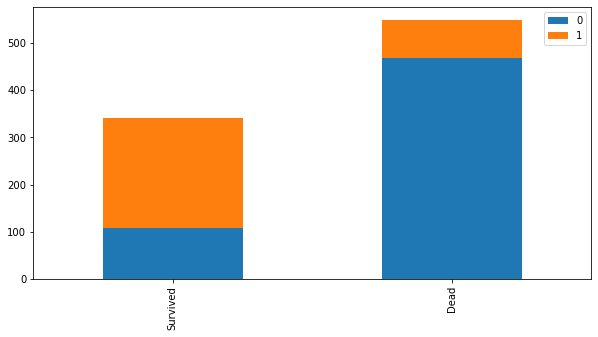

In [61]:
bar_chart('Sex')

In [62]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


## Age

train.isnull().sum()를 보면 나이 항목이 많이 비어있음을 볼 수 있어, 이를 채워주기 위해서 Mr, Miss, Mrs에 따라 평균나이를 구해서 채워준다.

In [63]:
# Missing Age를 각 Title에 대한 연령의 중간값으로 채운다.(Mr, Miss, Mrs. Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
#fillna는 NaN을 특정 값으로 대체하는 기능, median을 이용해 평균 계산

In [64]:
train.info()
#나이가 다 채워졌는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [65]:
train.loc[ train['Age'] <= 18, 'Age'] = 0
train.loc[(train['Age'] > 18) & (train['Age'] <= 28), 'Age'] = 1
train.loc[(train['Age'] > 28) & (train['Age'] <= 38), 'Age'] = 2
train.loc[(train['Age'] > 38) & (train['Age'] <= 48), 'Age'] = 3
train.loc[(train['Age'] > 48) & (train['Age'] <= 62), 'Age'] = 4
train.loc[ train['Age'] > 62, 'Age'] = 5

test.loc[ test['Age'] <= 18, 'Age'] = 0
test.loc[(test['Age'] > 18) & (test['Age'] <= 28), 'Age'] = 1
test.loc[(test['Age'] > 28) & (test['Age'] <= 38), 'Age'] = 2
test.loc[(test['Age'] > 38) & (test['Age'] <= 48), 'Age'] = 3
test.loc[(test['Age'] > 48) & (test['Age'] <= 62), 'Age'] = 4
test.loc[ test['Age'] > 62, 'Age'] = 5

In [66]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


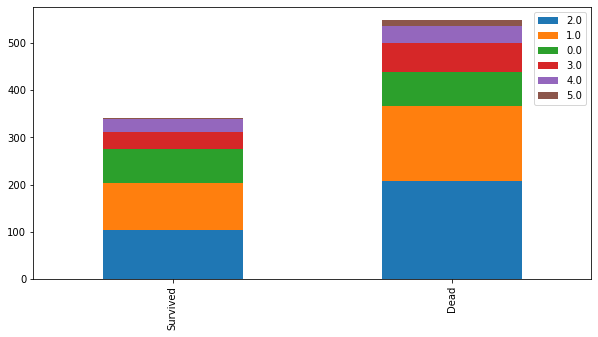

In [67]:
bar_chart('Age')

## Embarked

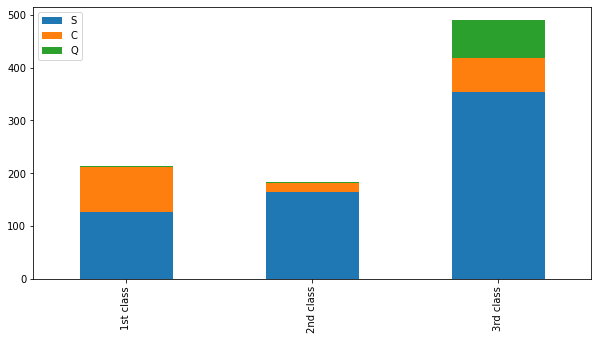

In [68]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5));

In [69]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
#S 도시에서 탄 사람들이 대부분이기에 기록 되지 않은 두개는 탑승지를 S로 둠

In [70]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


## Fare

In [72]:
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [73]:
train.loc[ train['Fare'] <= 17, 'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2
train.loc[ train['Fare'] > 100, 'Fare'] = 3

test.loc[ test['Fare'] <= 17, 'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2
test.loc[ test['Fare'] > 100, 'Fare'] = 5

In [74]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## Cabin

In [75]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1] #앞 글자만 추출

<AxesSubplot:>

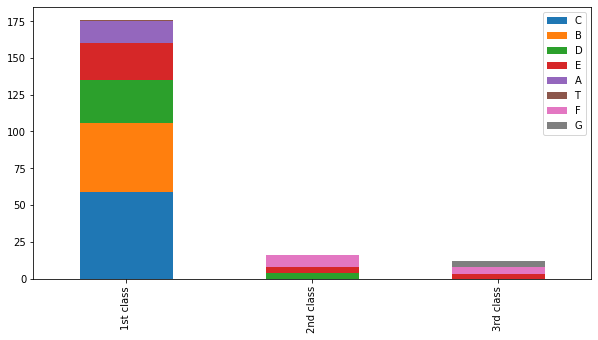

In [76]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [77]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [78]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## FamilySize

In [79]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
#sibsp : 함께 탑승한 형제 또는 배우자 수, parch : 함께 탑승한 부모 또는 자녀 수 + 본인

In [80]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,2.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [82]:
#쓰지 않을 특징 제거
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [83]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [84]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,2.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,4.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,1.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score # 교차 검증의 역할
from sklearn.model_selection import KFold # 교차 검증 수행
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [101]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.79775281 0.78651685 0.79775281 0.82022472
 0.79775281 0.83146067 0.83146067 0.86516854]


In [102]:
round(np.mean(score)*100, 2)

81.26

In [103]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.82022472 0.80898876 0.84269663 0.80898876
 0.84269663 0.85393258 0.84269663 0.85393258]


In [104]:
round(np.mean(score)*100,2)

83.05

In [105]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.7752809  0.73033708 0.78651685 0.84269663 0.75280899
 0.84269663 0.83146067 0.74157303 0.79775281]


In [106]:
round(np.mean(score)*100, 2)

78.9

In [107]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.86516854 0.78651685 0.80898876 0.85393258 0.80898876
 0.83146067 0.79775281 0.78651685 0.83146067]


In [108]:
round(np.mean(score)*100, 2)

81.37

In [109]:
clf = SVC() #정확도가 넷중 가장 높은 SVM으로 csv작성
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [110]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [111]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [112]:
from IPython.display import Image

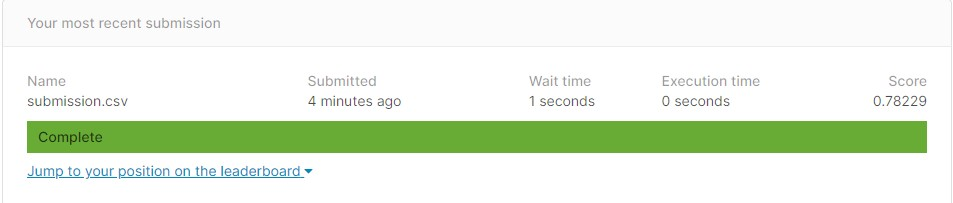

In [113]:
Image("C:/Users/dong5/accurcy.jpg")